In [3]:
pip install tensorflow

  Using cached tensorflow-2.5.0rc1-cp39-cp39-win_amd64.whl (422.5 MB)


You should consider upgrading via the 'c:\users\aashish\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\aashish\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib

You should consider upgrading via the 'c:\users\aashish\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [6]:
size=128

In [7]:
classify=models.Sequential()
classify.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 1)))
classify.add(layers.MaxPooling2D(pool_size=(2,2)))
classify.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 1)))
classify.add(layers.MaxPooling2D(pool_size=(2,2)))
classify.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 1)))

In [8]:
classify.add(layers.Flatten())

In [9]:
# Adding the final fully connected layer
classify.add(layers.Dense(units=128, activation='relu'))
classify.add(layers.Dense(units=35, activation='softmax')) 


In [10]:
classify.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
classify.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train= ImageDataGenerator(
               rescale=1./255,
               shear_range=0.2,
               zoom_range=0.2,
               horizontal_flip=True)
test=ImageDataGenerator(rescale=1./255)

In [14]:
training_dataset= train.flow_from_directory('C:/Users/AASHISH/Desktop/Source code-SLR/data1/train',
                                           target_size=(size,size),
                                           batch_size= 10,
                                           color_mode='grayscale',
                                           class_mode='categorical')
test_dataset=test.flow_from_directory('C:/Users/AASHISH/Desktop/Source code-SLR/data1/test',
                                       target_size=(size,size),
                                       batch_size= 10,
                                       color_mode='grayscale',
                                       class_mode='categorical')

Found 31500 images belonging to 35 classes.
Found 10500 images belonging to 35 classes.


In [16]:
history=classify.fit(
        training_dataset,
        steps_per_epoch=3150,
        epochs=3,
        validation_data=test_dataset,
        validation_steps=1050)

Epoch 1/3
3150/3150 [==============================] - 443s 141ms/step - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.0183 - val_accuracy: 0.9970
Epoch 2/3
3150/3150 [==============================] - 435s 138ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.0607 - val_accuracy: 0.9956
Epoch 3/3
3150/3150 [==============================] - 450s 143ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0378 - val_accuracy: 0.9946


In [17]:
print(classify.class_idices.values())

AttributeError: 'Sequential' object has no attribute 'class_idices'

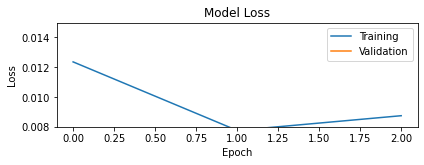

In [22]:
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.ylim([0.008,0.015])
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()


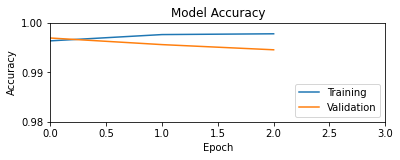

In [23]:
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0.98,1])
plt.xlabel('Epoch')
plt.xlim([0,3])
plt.legend(['Training', 'Validation'], loc='lower right')

In [24]:

score, acc = classify.evaluate(test_dataset,
                            batch_size=10)

1050/1050 [==============================] - 37s 35ms/step - loss: 0.0378 - accuracy: 0.9946


In [25]:
print(score)
print(acc)

0.03780191019177437
0.9945714473724365
